In [2]:
import pandas as pd

df = pd.read_csv('../data/earthquake_data_tsunami.csv')

In [3]:
import matplotlib.pyplot as plt

plt.savefig('../figures/distribucion_magnitud.png')

<Figure size 640x480 with 0 Axes>

In [4]:
# Ver las primeras filas
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [6]:
# Estadísticas descriptivas
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [7]:
# Contar terremotos con y sin tsunami
df['tsunami'].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [8]:
# Calcular porcentaje de tsunamis
total = len(df)
con_tsunami = df['tsunami'].sum()  # suma todos los 1s
porcentaje = (con_tsunami / total) * 100

print(f"Total de terremotos: {total}")
print(f"Con tsunami: {con_tsunami}")
print(f"Porcentaje con tsunami: {porcentaje:.2f}%")

Total de terremotos: 782
Con tsunami: 304
Porcentaje con tsunami: 38.87%


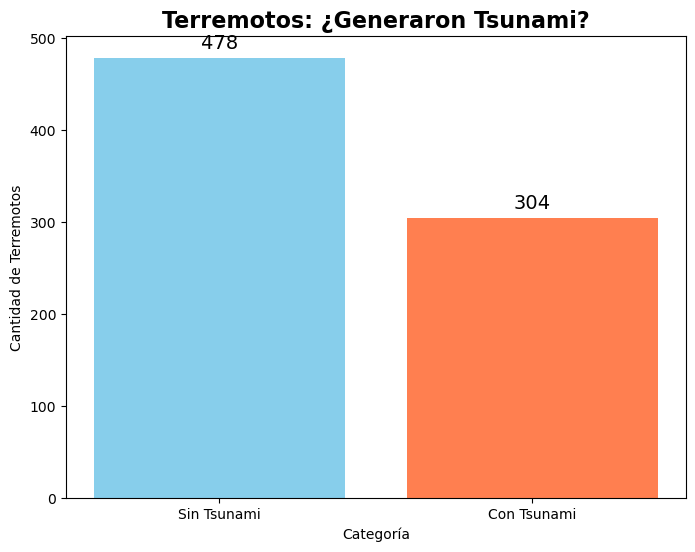

In [9]:
# Crear gráfico de barras
import matplotlib.pyplot as plt

# Contar tsunamis
conteo = df['tsunami'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.bar(['Sin Tsunami', 'Con Tsunami'], [conteo[0], conteo[1]], color=['skyblue', 'coral'])
plt.title('Terremotos: ¿Generaron Tsunami?', fontsize=16, fontweight='bold')
plt.ylabel('Cantidad de Terremotos')
plt.xlabel('Categoría')

# Agregar los números encima de las barras
plt.text(0, conteo[0] + 10, str(conteo[0]), ha='center', fontsize=14)
plt.text(1, conteo[1] + 10, str(conteo[1]), ha='center', fontsize=14)

# Guardar la figura
plt.savefig('../figures/tsunami_barras.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Ver cuántos terremotos hay de cada magnitud
df['magnitude'].value_counts().sort_index()

magnitude
6.50    131
6.60    115
6.70     98
6.80     78
6.90     77
7.00     49
7.10     43
7.20     30
7.30     31
7.40     18
7.50     22
7.60     22
7.70     16
7.80     15
7.90      9
8.00      5
8.10      6
8.16      1
8.20      6
8.30      3
8.40      2
8.60      2
8.80      1
9.10      2
Name: count, dtype: int64

In [11]:
# Contar terremotos con y sin tsunami
df['9.10'].value_counts()

KeyError: '9.10'

In [12]:
# Contar terremotos de magnitud 9.1
(df['magnitude'] == 9.1).sum()

np.int64(2)

In [13]:
# Filtrar y mostrar terremotos de magnitud 9.1
df[df['magnitude'] == 9.1]

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
476,9.1,9,8,2184,541,0.0,9.5,29.0,38.297,142.373,2011,3,0
668,9.1,0,8,1274,601,0.0,22.0,30.0,3.295,95.982,2004,12,0


In [14]:
# Calcular porcentajes por magnitud
total = len(df)

# Contar terremotos por rango de magnitud
mag_6 = len(df[(df['magnitude'] >= 6.0) & (df['magnitude'] < 7.0)])
mag_7 = len(df[(df['magnitude'] >= 7.0) & (df['magnitude'] < 8.0)])
mag_8 = len(df[(df['magnitude'] >= 8.0) & (df['magnitude'] < 9.0)])
mag_9 = len(df[df['magnitude'] >= 9.0])

# Calcular porcentajes
porc_6 = (mag_6 / total) * 100
porc_7 = (mag_7 / total) * 100
porc_8 = (mag_8 / total) * 100
porc_9 = (mag_9 / total) * 100

# Mostrar resultados
print(f"Total de terremotos: {total}")
print(f"\nMagnitud 6.x: {mag_6} terremotos ({porc_6:.2f}%)")
print(f"Magnitud 7.x: {mag_7} terremotos ({porc_7:.2f}%)")
print(f"Magnitud 8.x: {mag_8} terremotos ({porc_8:.2f}%)")
print(f"Magnitud 9.x: {mag_9} terremotos ({porc_9:.2f}%)")

Total de terremotos: 782

Magnitud 6.x: 499 terremotos (63.81%)
Magnitud 7.x: 255 terremotos (32.61%)
Magnitud 8.x: 26 terremotos (3.32%)
Magnitud 9.x: 2 terremotos (0.26%)


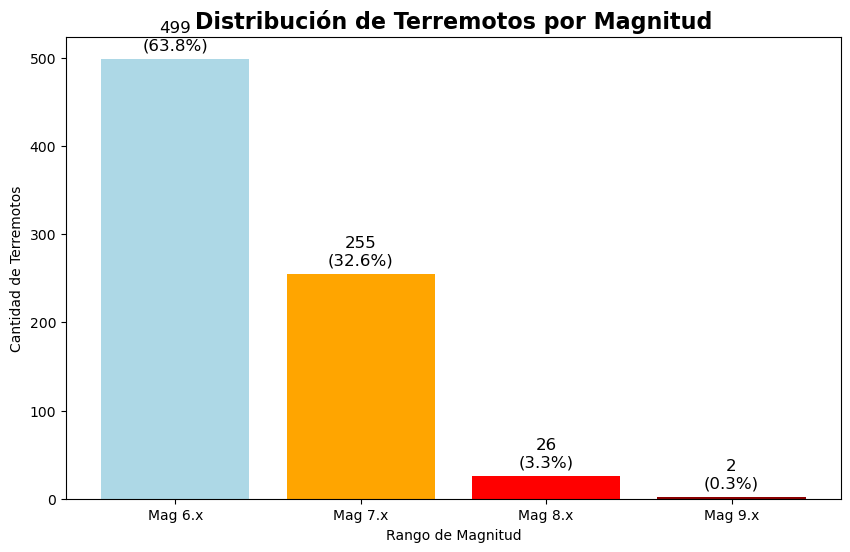

In [15]:
# Crear gráfico de distribución de magnitudes
magnitudes = ['Mag 6.x', 'Mag 7.x', 'Mag 8.x', 'Mag 9.x']
cantidades = [mag_6, mag_7, mag_8, mag_9]
colores = ['lightblue', 'orange', 'red', 'darkred']

plt.figure(figsize=(10, 6))
plt.bar(magnitudes, cantidades, color=colores)
plt.title('Distribución de Terremotos por Magnitud', fontsize=16, fontweight='bold')
plt.ylabel('Cantidad de Terremotos')
plt.xlabel('Rango de Magnitud')

# Agregar los números y porcentajes encima
for i, (cant, porc) in enumerate(zip(cantidades, [porc_6, porc_7, porc_8, porc_9])):
    plt.text(i, cant + 10, f'{cant}\n({porc:.1f}%)', ha='center', fontsize=12)

plt.savefig('../figures/distribucion_magnitud.png', dpi=300, bbox_inches='tight')
plt.show()


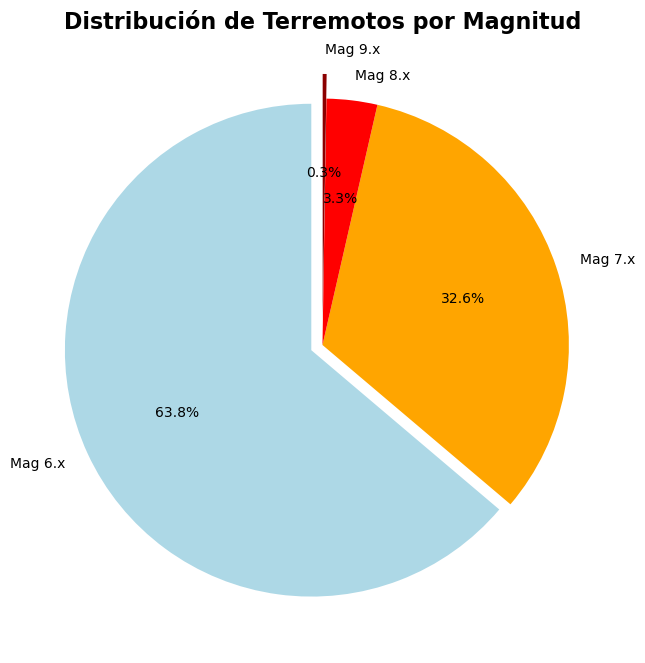

In [16]:
# Crear gráfico de pie
plt.figure(figsize=(10, 8))
plt.pie(cantidades, labels=magnitudes, autopct='%1.1f%%', 
        colors=colores, startangle=90, explode=[0.05, 0, 0, 0.1])
plt.title('Distribución de Terremotos por Magnitud', fontsize=16, fontweight='bold')
plt.savefig('../figures/distribucion_magnitud_pie.png', dpi=300, bbox_inches='tight')
plt.show()

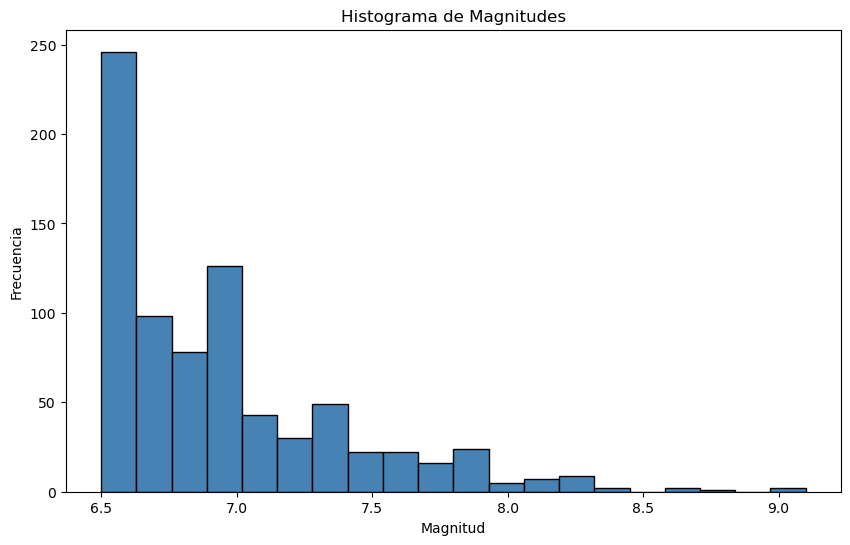

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['magnitude'], bins=20, edgecolor='black', color='steelblue')
plt.title('Histograma de Magnitudes')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.savefig('../figures/histograma_magnitud.png', dpi=300, bbox_inches='tight')
plt.show()

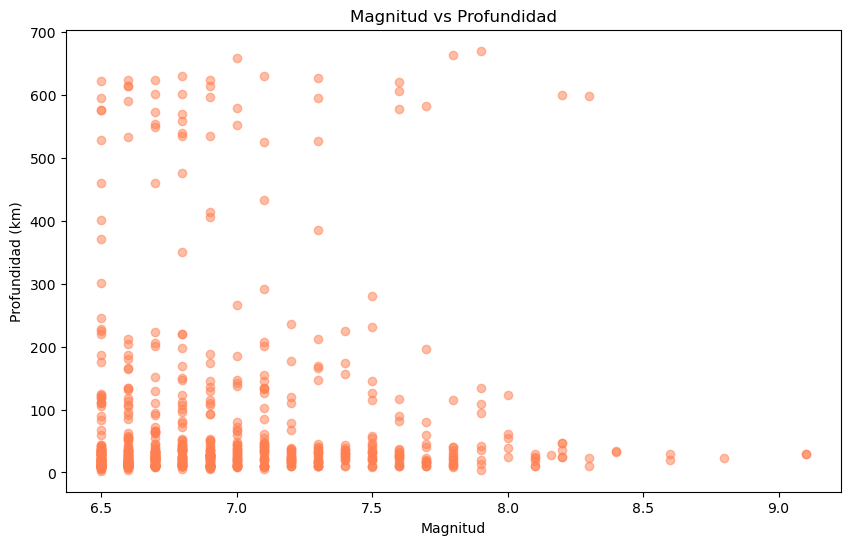

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['magnitude'], df['depth'], alpha=0.5, c='coral')
plt.title('Magnitud vs Profundidad')
plt.xlabel('Magnitud')
plt.ylabel('Profundidad (km)')
plt.savefig('../figures/magnitud_vs_profundidad.png', dpi=300, bbox_inches='tight')
plt.show()


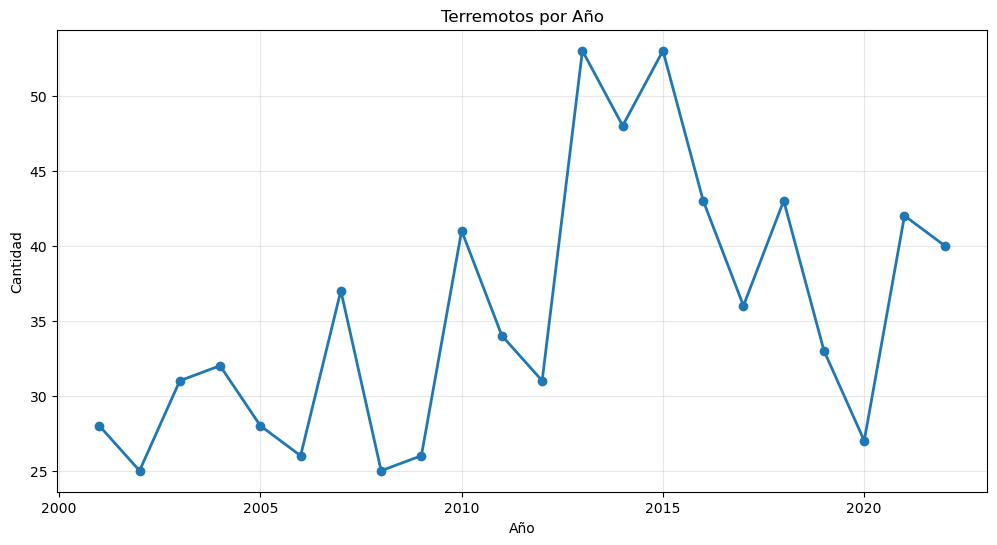

In [19]:
# Terremotos por año
terremotos_por_año = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(terremotos_por_año.index, terremotos_por_año.values, marker='o', linewidth=2)
plt.title('Terremotos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.savefig('../figures/terremotos_por_año.png', dpi=300, bbox_inches='tight')
plt.show()

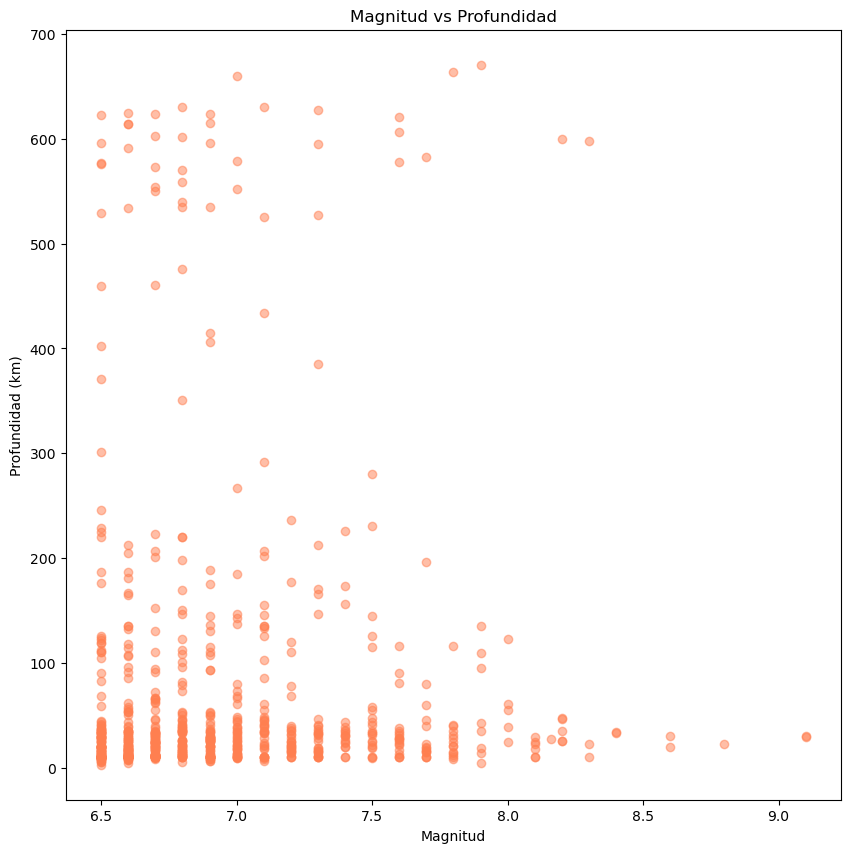

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(df['magnitude'], df['depth'], alpha=0.5, c='coral')
plt.title('Magnitud vs Profundidad')
plt.xlabel('Magnitud')
plt.ylabel('Profundidad (km)')
plt.savefig('../figures/magnitud_vs_profundidad.png', dpi=300, bbox_inches='tight')
plt.show()

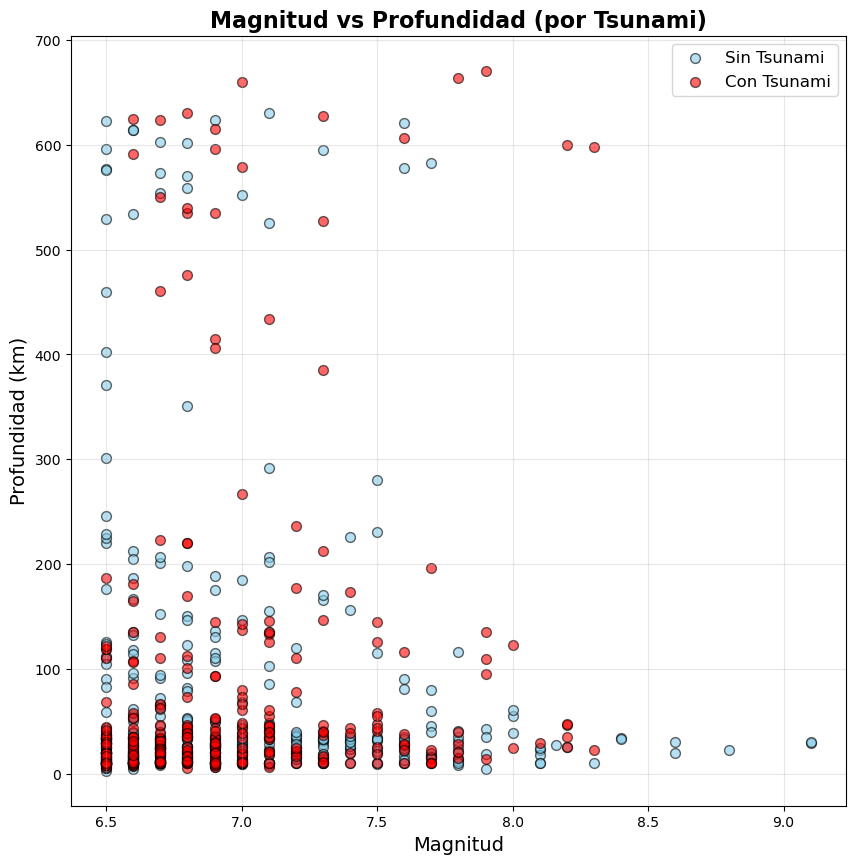

In [21]:
# Scatter plot: Magnitud vs Profundidad (coloreado por tsunami)
plt.figure(figsize=(10, 10))

# Separar datos
sin_tsunami = df[df['tsunami'] == 0]
con_tsunami = df[df['tsunami'] == 1]

# Graficar cada grupo con diferente color
plt.scatter(sin_tsunami['magnitude'], sin_tsunami['depth'], 
           alpha=0.6, s=50, c='skyblue', label='Sin Tsunami', edgecolors='black')
plt.scatter(con_tsunami['magnitude'], con_tsunami['depth'], 
           alpha=0.6, s=50, c='red', label='Con Tsunami', edgecolors='black')

plt.title('Magnitud vs Profundidad (por Tsunami)', fontsize=16, fontweight='bold')
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Profundidad (km)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.savefig('../figures/magnitud_profundidad_tsunami.png', dpi=300, bbox_inches='tight')
plt.show()